In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#3.a
dataset = pd.read_csv("grade_data.csv")
print(dataset)

    Student_ID  Hours_Studied  Test_Score
0            1       5.488135   65.789177
1            2       7.151894   94.767733
2            3       6.027634   84.794793
3            4       5.448832   61.881722
4            5       4.236548   86.065262
..         ...            ...         ...
95          96       1.831914   65.975513
96          97       5.865129   71.291550
97          98       0.201075   44.109880
98          99       8.289400   86.891676
99         100       0.046955   50.409565

[100 rows x 3 columns]


In [7]:
#3.b
print(dataset.sample(10))

    Student_ID  Hours_Studied  Test_Score
66          67       8.209932   81.921439
7            8       8.917730   92.789402
84          85       5.666015   66.075718
44          45       6.667667   76.392657
60          61       1.589696   43.035903
90          91       3.185690   75.137036
39          40       6.818203   93.313082
83          84       6.924721   85.499118
50          51       5.701968   70.810678
11          12       5.288949   88.669197


In [11]:
#3.c
dataset.dropna(inplace = True)
print(dataset)

    Student_ID  Hours_Studied  Test_Score
0            1       5.488135   65.789177
1            2       7.151894   94.767733
2            3       6.027634   84.794793
3            4       5.448832   61.881722
4            5       4.236548   86.065262
..         ...            ...         ...
95          96       1.831914   65.975513
96          97       5.865129   71.291550
97          98       0.201075   44.109880
98          99       8.289400   86.891676
99         100       0.046955   50.409565

[100 rows x 3 columns]


In [13]:
for x in dataset.index:
  if dataset.loc[x, 'Test_Score'] <0 or dataset.loc[x, 'Test_Score'] > 100:
    dataset.loc[x,'Test_Score'] = round(dataset['Test_Score'].mean(),2)

print(dataset)

    Student_ID  Hours_Studied  Test_Score
0            1       5.488135   65.789177
1            2       7.151894   94.767733
2            3       6.027634   84.794793
3            4       5.448832   61.881722
4            5       4.236548   86.065262
..         ...            ...         ...
95          96       1.831914   65.975513
96          97       5.865129   71.291550
97          98       0.201075   44.109880
98          99       8.289400   86.891676
99         100       0.046955   50.409565

[100 rows x 3 columns]


In [14]:
#3.d
dataset = dataset.drop('Student_ID', axis = 1)
print(dataset)

    Hours_Studied  Test_Score
0        5.488135   65.789177
1        7.151894   94.767733
2        6.027634   84.794793
3        5.448832   61.881722
4        4.236548   86.065262
..            ...         ...
95       1.831914   65.975513
96       5.865129   71.291550
97       0.201075   44.109880
98       8.289400   86.891676
99       0.046955   50.409565

[100 rows x 2 columns]


In [16]:
#3.e
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:, -1]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.275, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [45]:
Y_pred_test = model.predict(X_test)
# Y_pred_train = model.predict(X_test)


In [49]:
from sklearn.metrics import r2_score
score_test = r2_score(Y_test, Y_pred_test)
print(score_test)
# score_train = r2_score(Y_train, Y_pred_train)
# print(score_train)

0.5396330146842419


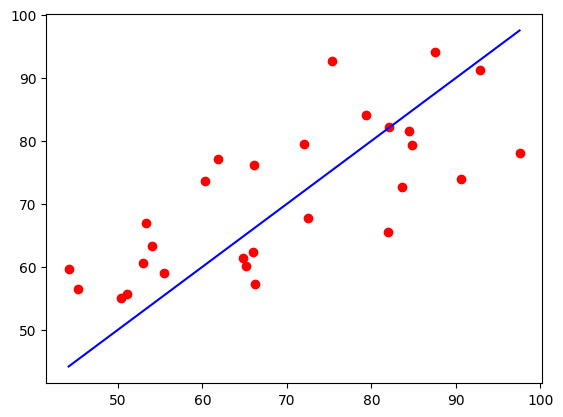

In [51]:
plt.scatter(Y_test, Y_pred_test, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(),Y_test.max()], color = 'blue')
plt.show()

In [52]:
hours_to_predict = [[5], [10]]
grades_predicted = model.predict(hours_to_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
print(f'Predicted 5hr: {grades_predicted[0]}')
print(f'Predicted 10hr: {grades_predicted[1]}')

Predicted 5hr: 75.22065888221084
Predicted 10hr: 95.63650887736341
